<center> <font size = 5> The diabetes dataset </font></center>

### I. Pre-processing of the dataset.

In [1]:
import pandas as pd
df=pd.read_csv("diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Except "Age", all attributes are categorical and have values either "yes" or "no". We are going to apply one-hot encoding to all attributes except "Age".

In [2]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown="ignore")
sub_df=df.drop(["Age","class"],axis=1)
sub_df=pd.DataFrame(enc.fit_transform(sub_df).toarray())
sub_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


One-hot encode the predictor variables.

In [3]:
age=df[["Age"]]
X=pd.concat([age,sub_df],axis=1)
X.head()

,Age,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,40,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,58,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,41,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,45,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,60,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


One-hot encode the target variable.

In [4]:
y=pd.DataFrame(enc.fit_transform(df[["class"]]).toarray())
y.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


Split the data set into train and test sets.

In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.33, random_state=42)

### II. TensorFlow

Build the model with TensorFlow.

In [6]:
import tensorflow as tf
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = trainX.shape[1]

# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trainY.shape[1]


# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) 
yGold = tf.placeholder(tf.float32, [None, numLabels]) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

In [7]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.001,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.001,
                                    name="bias"))

In [8]:
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

In [9]:
# Number of Epochs in our training
numEpochs = 80000

# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.0001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.9,
                                          staircase=True)

In [10]:
#Defining our cost function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

#Defining our Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [11]:
# Create a tensorflow session
sess = tf.Session()

# Initialize our weights and biases variables.
init_OP = tf.global_variables_initializer()

# Initialize all tensorflow variables
sess.run(init_OP)

In [12]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [13]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 1000 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

step 0, training accuracy 0.600575, cost 114.887, change in cost 114.887
step 1000, training accuracy 0.804598, cost 56.6106, change in cost 58.2766
step 2000, training accuracy 0.882184, cost 32.6268, change in cost 23.9838
step 3000, training accuracy 0.908046, cost 24.7462, change in cost 7.8806
step 4000, training accuracy 0.925287, cost 22.8926, change in cost 1.85355
step 5000, training accuracy 0.925287, cost 22.014, change in cost 0.87863
step 6000, training accuracy 0.939655, cost 21.365, change in cost 0.648972
step 7000, training accuracy 0.942529, cost 20.863, change in cost 0.502064
step 8000, training accuracy 0.942529, cost 20.4613, change in cost 0.401644
step 9000, training accuracy 0.942529, cost 20.1317, change in cost 0.32966
step 10000, training accuracy 0.939655, cost 19.8556, change in cost 0.276112
step 11000, training accuracy 0.939655, cost 19.6205, change in cost 0.235065
step 12000, training accuracy 0.939655, cost 19.4177, change in cost 0.202839
step 13000

Visualize the accuracy and cost values.

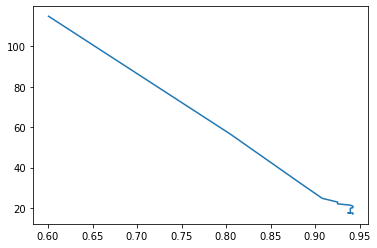

In [14]:
import matplotlib.pyplot as plt
plt.plot(accuracy_values,cost_values)
plt.show()

"sess.run" compares the predicted label with the actual label and outputs True for correct predictions and False for incorrect predictions.

In [15]:
array=sess.run(correct_predictions_OP,feed_dict={X:testX,yGold:testY})
pred=pd.DataFrame(data=array, columns=["Correct=True"])

Output the rows that the model missed.

In [16]:
incorrect=pred[pred["Correct=True"] != True]
incorrect

,Correct=True
39,False
41,False
58,False
72,False
100,False
121,False
135,False
171,False


In [17]:
incorrect=df.iloc[[39,41,58,72,100,121,135,171],:]
incorrect

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,class
39,30,Female,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Positive
41,50,Female,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,No,Positive
58,59,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive
72,65,Female,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Positive
100,48,Female,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Positive
121,35,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Positive
135,66,Male,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Positive
171,48,Male,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Positive


As shown, all the missed "class" are positive. The model correctly classified all negative instances.That tells us the model has a 100% specificity.

We can compute the sensitivity of the model.

In [18]:
testY=testY.rename(columns={0:"Col_1",1:"Col_2"})
testY.head()

,Col_1,Col_2
275,1.0,0.0
93,0.0,1.0
6,0.0,1.0
167,0.0,1.0
90,0.0,1.0


Compute sensitivity. Sensitivity = # of true positive divided by total # of positive.

In [21]:
testY_yes=testY[testY["Col_2"] == 1] # Select all the positive instances in the test data. 
print("The sensitivity of the model is: ", (len(testY_yes)-len(incorrect))/len(testY_yes))

The sensitivity of the model is:  0.9279279279279279


The model has a sensitivity of 92.8% 

The model with TensorFlow has a sensitivity of 92.8%, specificity of 100%  and an overall accuracy of 95.35% on test data. Not bad at all.

Let's try neural network with Keras and see if we can get beyond 95.35%.

### III. Neural network with Keras.

In [32]:
length=trainX.shape[1]
num_classes=testY.shape[1]

# Load the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

# define classification model

def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(550, activation='tanh'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [33]:
model=classification_model()
model.fit(trainX,trainY,validation_data=(testX, testY),epochs=100, verbose=2)
model.evaluate(testX,testY,verbose=0)

Train on 348 samples, validate on 172 samples
Epoch 1/100
 - 1s - loss: 0.7165 - acc: 0.5172 - val_loss: 0.5931 - val_acc: 0.6802
Epoch 2/100
 - 0s - loss: 0.6182 - acc: 0.6782 - val_loss: 0.5509 - val_acc: 0.6628
Epoch 3/100
 - 0s - loss: 0.5556 - acc: 0.7241 - val_loss: 0.4876 - val_acc: 0.7093
Epoch 4/100
 - 0s - loss: 0.4807 - acc: 0.7816 - val_loss: 0.4154 - val_acc: 0.8779
Epoch 5/100
 - 0s - loss: 0.4020 - acc: 0.8563 - val_loss: 0.3632 - val_acc: 0.8895
Epoch 6/100
 - 0s - loss: 0.3596 - acc: 0.8534 - val_loss: 0.3432 - val_acc: 0.8256
Epoch 7/100
 - 0s - loss: 0.3071 - acc: 0.8966 - val_loss: 0.2788 - val_acc: 0.9070
Epoch 8/100
 - 0s - loss: 0.2684 - acc: 0.8966 - val_loss: 0.2617 - val_acc: 0.9070
Epoch 9/100
 - 0s - loss: 0.3171 - acc: 0.8563 - val_loss: 0.3067 - val_acc: 0.8256
Epoch 10/100
 - 0s - loss: 0.4461 - acc: 0.8161 - val_loss: 0.4163 - val_acc: 0.7791
Epoch 11/100
 - 0s - loss: 0.2645 - acc: 0.8966 - val_loss: 0.2240 - val_acc: 0.9302
Epoch 12/100
 - 0s - loss: 0

[0.12225702197052711, 0.9593023269675499]

The neural network model delivered a slightly better performance than the model with TensorFlow, yielding a 96% accuracy on test data.